In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
import matplotlib as mpl
import matplotlib.pylab as plt

In [2]:
mpl.rc('font',family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## RandomOverSampler

In [12]:
from imblearn.over_sampling import *

from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC


def classification_result(n0, n1, title=""):
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])

    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)

    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred

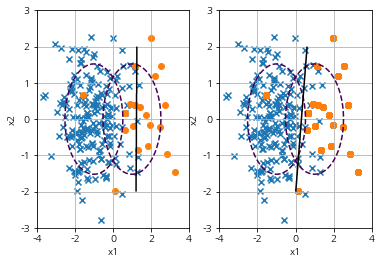

In [14]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
plt.grid(True)
classification_result2(X_imb, y_imb)
plt.subplot(122)
plt.grid(True)
model_samp = classification_result2(X_samp, y_samp)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.51      0.95      0.67        20

    accuracy                           0.91       220
   macro avg       0.75      0.93      0.81       220
weighted avg       0.95      0.91      0.92       220



## ADASYN

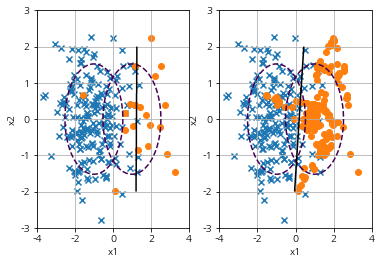

In [20]:
X_samp, y_samp = ADASYN(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
plt.grid(True)
classification_result2(X_imb, y_imb)
plt.subplot(122)
plt.grid(True)
model_samp = classification_result2(X_samp, y_samp)

In [21]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       200
         1.0       0.47      0.95      0.63        20

    accuracy                           0.90       220
   macro avg       0.73      0.92      0.79       220
weighted avg       0.95      0.90      0.91       220



## SMOTE

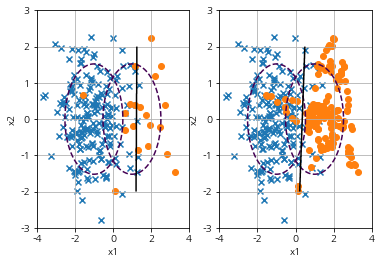

In [23]:
X_samp, y_samp = SMOTE(random_state=4).fit_resample(X_imb, y_imb)

plt.subplot(121)
plt.grid(True)
classification_result2(X_imb, y_imb)
plt.subplot(122)
plt.grid(True)
model_samp = classification_result2(X_samp, y_samp)

In [24]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       200
         1.0       0.50      0.90      0.64        20

    accuracy                           0.91       220
   macro avg       0.74      0.91      0.80       220
weighted avg       0.94      0.91      0.92       220



## SMOTE + ENN

In [26]:
from imblearn.combine import *

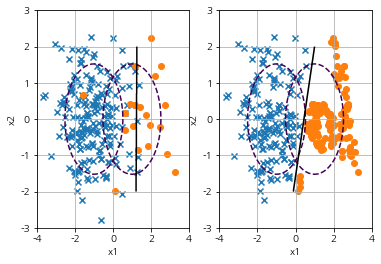

In [28]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_resample(X_imb, y_imb)

plt.subplot(121)
plt.grid(True)
classification_result2(X_imb, y_imb)
plt.subplot(122)
plt.grid(True)
model_samp = classification_result2(X_samp, y_samp)

In [29]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       200
         1.0       0.54      0.95      0.69        20

    accuracy                           0.92       220
   macro avg       0.77      0.94      0.82       220
weighted avg       0.95      0.92      0.93       220



## SMOTE + Tomek

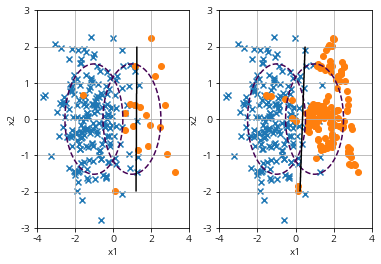

In [31]:
X_samp, y_samp = SMOTETomek(random_state=4).fit_resample(X_imb, y_imb)

plt.subplot(121)
plt.grid(True)
classification_result2(X_imb, y_imb)
plt.subplot(122)
plt.grid(True)
model_samp = classification_result2(X_samp, y_samp)

In [32]:
print(classification_report(y_imb, model_samp.predict(X_imb)))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       200
         1.0       0.51      0.90      0.65        20

    accuracy                           0.91       220
   macro avg       0.75      0.91      0.80       220
weighted avg       0.95      0.91      0.92       220

